In [2]:
%matplotlib inline
import time
print('Last updated: %s' %time.strftime('%d/%m/%Y'))
import sys
sys.path.insert(0,'../..')
from IPython.display import HTML
from helpers import show_hide
HTML(show_hide)

Last updated: 15/07/2015


image entropy
=============

$H(X) = \mathbb{E}_{X} [I(x)] = -\sum_{x \in \mathbb{X}} p(x) \log p(x)$

where

$p(x)$

is the probability of occurence of a specific symbol. For gray level images, one usually use the relative frequency.

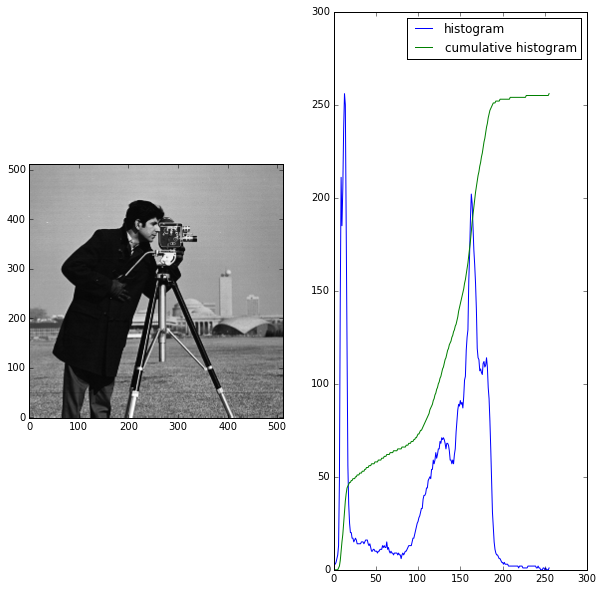

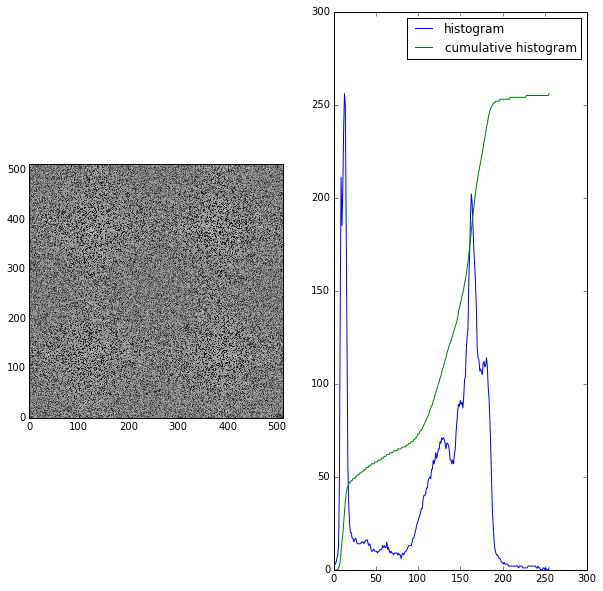

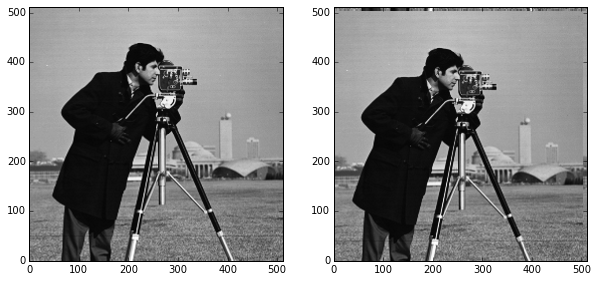

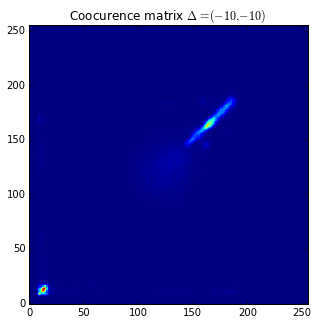

In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from skimage.data import camera

def plot_histo(im):
    h, b = np.histogram(im[:], range(0, 257))
    h_scaled = 256 * h / np.max(h)
    h_cum = np.cumsum(h)
    h_cum_scaled = 256 * h_cum / np.max(h_cum)

    plt.figure(figsize=[10,10])
    plt.subplot(1, 2, 1)
    plt.imshow(im, cmap=cm.gray, origin='lower')
    plt.subplot(1, 2, 2)
    plt.plot(h_scaled)
    plt.plot(h_cum_scaled)
    plt.legend(['histogram', 'cumulative histogram'])
    return h

im = camera()[-1::-1,:]

d = im.flatten()
dn = np.random.permutation(d)
dn = dn.reshape(im.shape)

#filtered version
plot_histo(im)
plot_histo(dn)

#coocurence matrix

dm = -10
dn = -10

rim = np.roll(im,dm,axis=0)
rim = np.roll(rim,dn,axis=1)

G1 = im.flatten()
G2 = rim.flatten()

histo2D = np.zeros((256,256))

for g1,g2 in zip(G1,G2):
    histo2D[g1,g2] = histo2D[g1,g2]+1

plt.figure(figsize=[10,10])
plt.subplot(1,2,1)
plt.imshow(im,interpolation='nearest',cmap=cm.gray,origin='lower')
plt.subplot(1,2,2)
plt.imshow(rim,interpolation='nearest',cmap=cm.gray,origin='lower')

plt.figure(figsize=[5,5])
plt.title('Coocurence matrix $\Delta = (%d,%d)$ '%(dn,dm))
plt.imshow(histo2D,interpolation='nearest',cmap=cm.jet,origin='lower')

plt.show()